# Hypothesis Testing — Notes with Python Examples

## 0. Generel mathod:
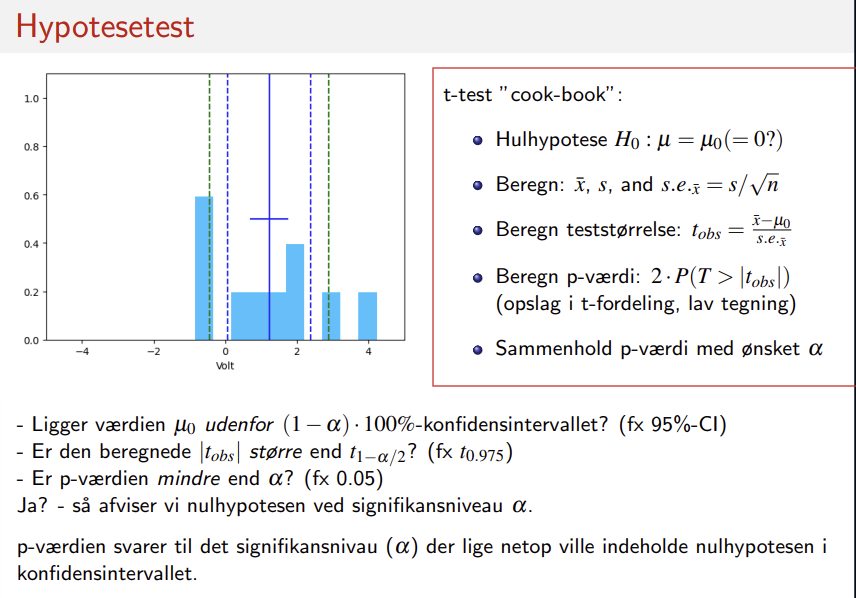
---

## 1. Introduction & Intuition
- **Goal**: Decide whether sample data provide enough evidence to reject a claim about a population.
- Think of it like a courtroom trial: the **null hypothesis** ($H_0$) is the default "innocent" assumption.
- Example scenarios: coin flips, mean differences, proportions.

---

## 2. Setting Up Hypotheses
- **Null hypothesis ($H_0$)**: represents no effect or no difference.  
- **Alternative hypothesis ($H_1$ or $H_a$)**: represents what you aim to support.  

Example: Testing if a coin is fair vs biased towards heads:

$$
H_0: p = \tfrac{1}{2} \quad \text{(coin is fair)} \\
H_1: p > \tfrac{1}{2} \quad \text{(more heads than expected)}
$$

---
## 2,5. Alpha
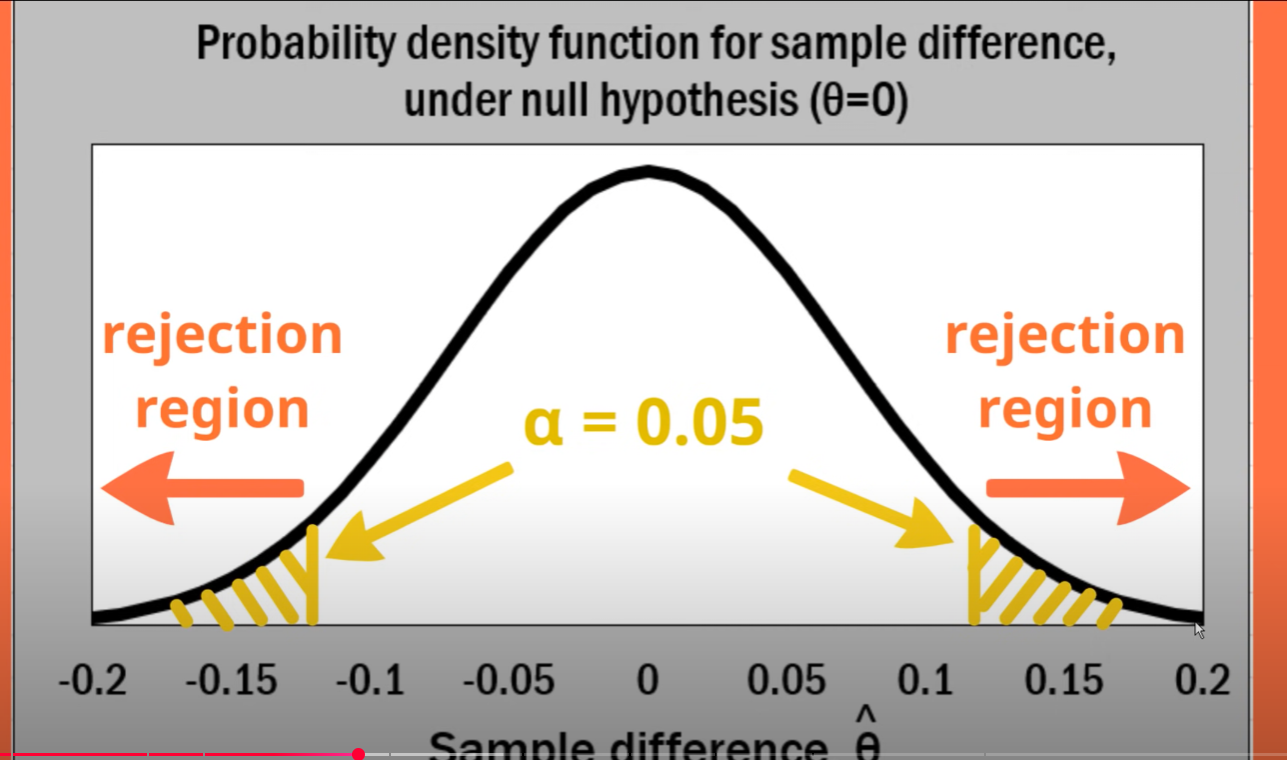

- Alpha is kind of the rejection region
- If the samplr difference lies in between the exstremes values, so the most extsreme 5%, we rejct the null hypothesis
- And if it was in between -0.1 and 0.1, we would accept because then they aere alike (0 is amoung them)


---

## 3. Test Statistic
- A summary measure calculated from sample data — e.g., z-score or t-score.  
- Decides how far the sample result deviates from $H_0$. 
 
 
- The test statistic is **the general measure you calculate in a hypothesis test to decide whether to reject the null hypothesis**. It compares the sample data to what is expected under the null.

- The observed test statistic (often written as t_obs, z_obs, etc.) is just **the specific numerical value** you get when you plug your sample data into that formula.

Example: Testing mean with known population standard deviation:

$$
z = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}}
$$

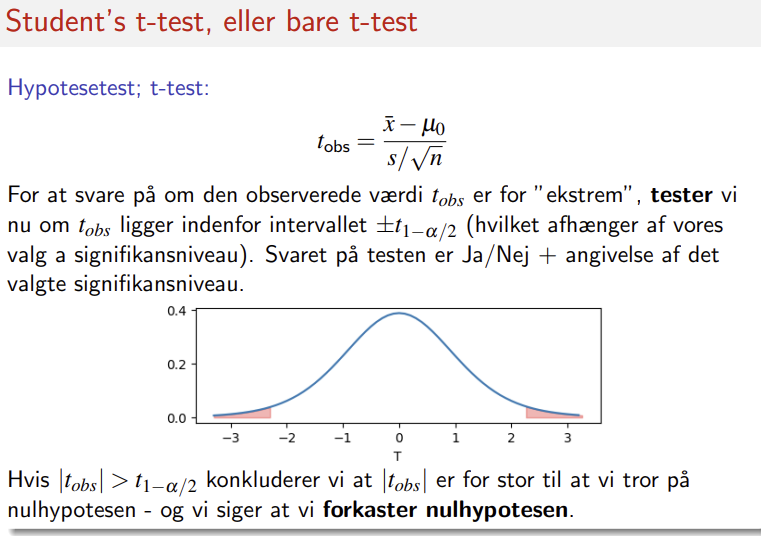

 - **If the t_statistic value is greather than 1.96, we can reject the null hypothesis ( when alpha is 5%)**



**Python Example:**
```python
import numpy as np
from scipy import stats

data = np.array([101, 98, 100, 102, 99])  # sample data
mu0 = 100  # hypothesized mean
sigma = 2  # known population std
n = len(data)

z = (data.mean() - mu0) / (sigma / np.sqrt(n))
print("z =", z)
```

---
## 4. P-Value & Significance
- **P-value**: probability of observing data as extreme (or more) under $H_0$.  
- **Decision rule**: If $p \leq \alpha$ (commonly $\alpha = 0.05$), reject $H_0$.


### **Example**:
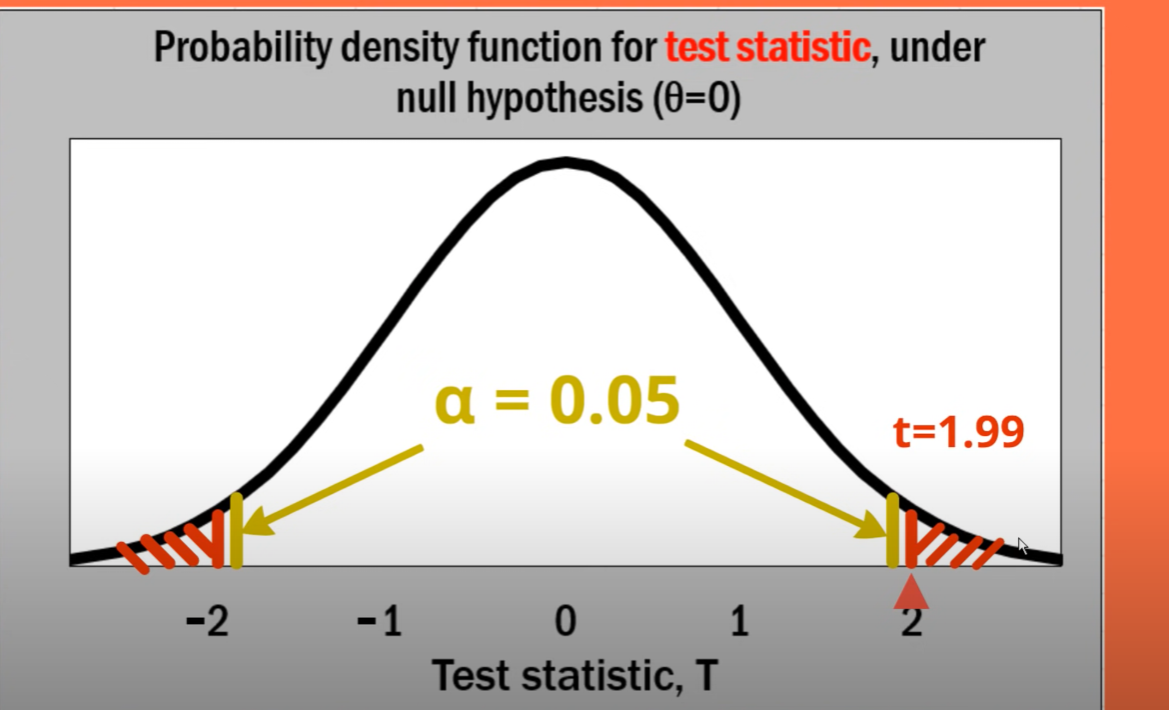

### - We have calculated the test_statistic and the value is 1.99. That means its just makes it inside the rejection region. 

### - The remaining shaded region is then the p-value ( the red shaded area):
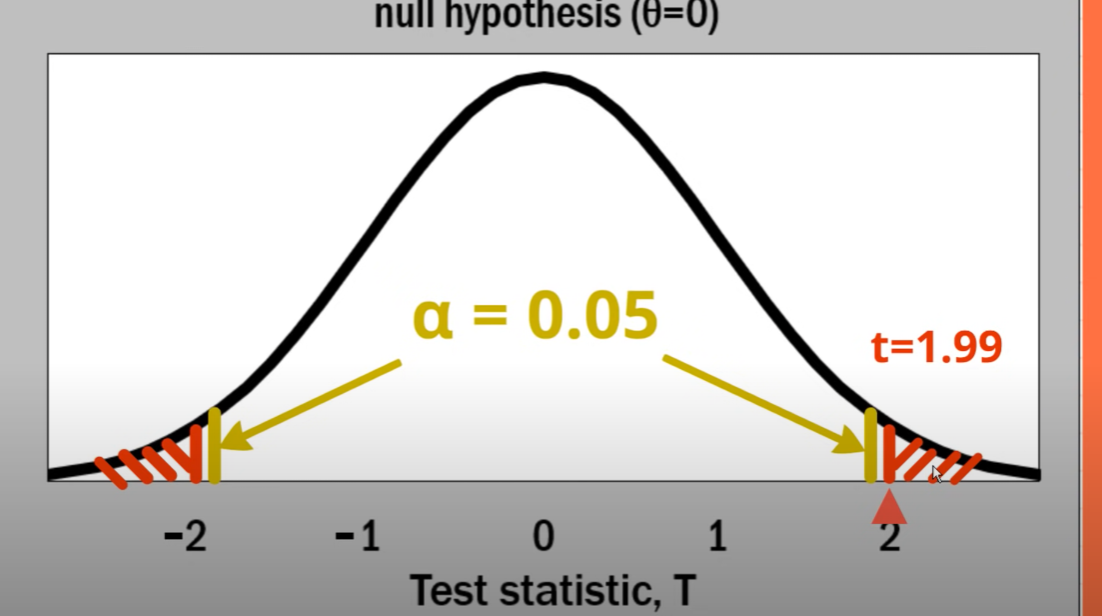

### - So its the proportion of samples that would have a more exstreme test_statistic than ours. 


### **Generel rule**:
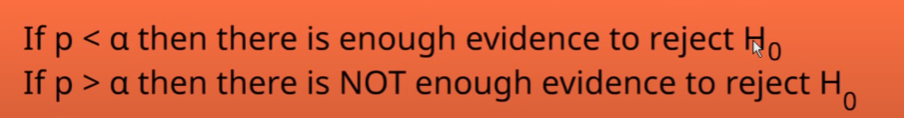


### **P-value schema:**
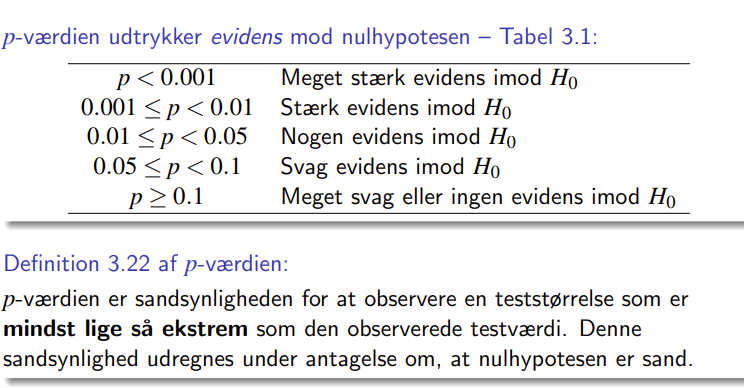

**Python Example:**
```python
p_value = 2 * (1 - stats.norm.cdf(abs(z)))  # two-tailed test
alpha = 0.05
print("p-value =", p_value)

if p_value <= alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")
```

---
## 5. Example Walkthrough

Suppose a sample of cement strengths is tested with mean hypothesized to be $5.0$.

**Python Example:**

```python
import numpy as np
from scipy import stats

data = np.array([5.1, 4.9, 5.0, 5.2, 5.1])
mu0 = 5.0
sigma = 0.1
n = len(data)

z = (data.mean() - mu0) / (sigma / np.sqrt(n))
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

print(f"z = {z:.3f}, p-value = {p_value:.4f}")
if p_value <= 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

```
---
## 6. Confidence Intervals

Confidence intervals give a range of plausible values for a population parameter.

For a $95\%$ CI with known $\sigma$:

$$
\bar{x} \pm z_{0.975} \cdot \frac{\sigma}{\sqrt{n}}
$$

**Python Example:**

```python
ci_low, ci_high = stats.norm.interval(
    0.95, loc=data.mean(), scale=sigma/np.sqrt(n)
)
print(f"95% CI: [{ci_low:.3f}, {ci_high:.3f}]")
```
---
## 7. Summary Table

| Step              | Description                         | Python Example                     |
|-------------------|-------------------------------------|------------------------------------|
| 1. Hypotheses     | Define $H_0$ and $H_1$              | `mu0`, alternative                 |
| 2. Test Statistic | Compute $z$ or $t$ score            | `stats.norm` or `stats.ttest_*`    |
| 3. P-value        | Probability under $H_0$             | `stats.norm.cdf`                   |
| 4. Decision       | Compare with $\alpha$ threshold     | `if p_value <= alpha: ...`         |
| 5. CI             | Range estimation                    | `stats.norm.interval()`            |

